# REPORTE 8

- Con Luis Felipe Acosta (20143350)

## PARTE LECTURA


Los distintos sistemas de trabajo a lo largo de historia pueden afectar las dinámicas sociales y económicas de las diferentes épocas. La mita fue un sistema de trabajo obligatorio y que tenía mayor concurrencia en trabajos destinados a la extracción de minerales. En este sentido, el artículo histórico de Dell nos expone las implicancias de la práctica de la mita durante la época colonial en Bolivia y Perú. De esta manera, la pregunta de investigación de Dell sería: ¿Cuál es el impacto -a largo plazo- de la mita, como sistema de trabajo forzado, en las poblaciones en las que esta modalidad de trabajo fue más concurrida?.

Una de las fortalezas del artículo es que, a pesar de la distancia histórica, expone las implicancias de la mita en las poblaciones afectadas por tal. En este sentido, los principales hallazgos de Dell serían que los efectos de la mita en las zonas previstas son negativas; lo que podría explicar las diferencias y precariedad de dichas zonas del Perú. Por otro lado, a pesar de la dificultad de ser un trabajo enfocado en una etapa histórica antigua, Dell hizo un buen trabajo al presentar una regresión discontinua. Asimismo, Dell supo delimitar muy bien el tema presentado: la MITA (sistema de trabajo geolocalizado en una región específica del mundo) en zonas mineras (aún más delimitado). Esta buena delimitación del tema genera mayor confianza en las conclusiones que se puedan obtener. Sin embargo, una debilidad del trabajo podría ser que no se tomó mucha atención a las diferencias dentro de la misma región, tanto culturales como las pequeñas diferencias que pudieron existir del sistema de trabajo estudiado.

Por otro lado, el aporte del documento es que puede explicar y/o dar razones históricas a la precariedad y desigualdad en el país. Sin embargo, aunque el documento usa una regresión discontinua, se debieron tomar en consideración la distancia temporal y que, en esta, pueden haber muchísimas otras variables a tomar en cuenta. Sin embargo, esto no le quita solidez a su trabajo debido a que, la mita -como el autor ha expuesto- ha dañado a diversas comunidades sociales, siendo un factor a tomar en cuenta. 

Por último, un paso para avanzar a la pregunta de investigación podría ser el artículo de Bohórquez que demuestra las consecuencisa sociales y ambientales de la explotación de recursos mineros en Colombia, este artículo no se aleja dela región y además se puede contrastar con el artículo de Dell debido a que se puede reconocer y hacer un cuadro comparativo de similitudes y diferencias de los efectos y consecuencias de la explotación laboral en ambos casos. Este análisis sería ideal para poder analñizar el cambio después de tantos años de diferencia y también se podría estimar ciuertas consecuencias futuras para el segundo caso.

BIBLIOGRAFÍA

Dell, M. (2010). The persistent effects of Peru's mining mita. Econometrica, 78(6), 1863-1903

Bohórquez Rozo, I. A. (2014). Normatividad para empresas de explotación de carbón en Colombia, sus efectos sociales y ambientales.

## PARTE PRÁCTICA

In [27]:
pip install plotnine

     |████████████████████████████████| 1.2 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 9.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install linearmodels

     |████████████████████████████████| 1.5 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 68 kB 1.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import seaborn as sns
import matplotlib.pyplot as plt
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS

### Instrumental Variables

El cumplimiento de los supuestos de las variables instrumentales son requeridos para que los instrumentales puedan funcionar. Estos supuestos son:

- El supuesto de "Relevance": Este supuesto implica que se necesita de un grado considerable de correlación entre el tratamiento y el instrumento; en otras palabras, al menos en parte, el instrumento debe de poder explicar el tratamiento, porque sino es así, la estimación no funcionaría. En este sentido, se debe reconocer que hay cierta relación entre el instrumento y el tratamiento. 

- El supuesto de "Validity": Este supuesto contiene que el uso de la variable instrumental para reconocer un efecto del tratamiento debe estar regulado por observaciones al surgimiento de caminos alternativos que puedan invalidar la función del instrumento. Estos caminos son "instrumento" <- "B" -> "Ycamino" e "instrumento" -> "A" -> "Ysendero"

### Ploteo de Histogramas

- Grafique dos histogramas para la variable años de educación (educ) para cuando (nearc4) == 1, y cuando (nearc4) == 0. Compare y describa los patrones que encuentra.

In [36]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

#Table2
card2 = (card
 .assign(college_in_county = np.select(
     [card["nearc4"].astype(bool)],
     ["1"],
      default="0"
 )))
card2

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ,college_in_county
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539,0
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562,0
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975,0
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536,1
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,5218.0,0.0,1.0,12.0,25.0,8.0,12.0,82135.0,1.0,0.0,...,NaN,1.0,0.0,7.0,5.814130,49.0,-0.289775,6.103905,-1.505588,1
3006,5219.0,0.0,1.0,13.0,34.0,NaN,NaN,88765.0,1.0,0.0,...,NaN,1.0,1.0,15.0,6.175867,225.0,-0.137418,6.313285,2.214089,1
3007,5220.0,0.0,1.0,12.0,24.0,11.0,NaN,89271.0,0.0,0.0,...,109.0,1.0,0.0,6.0,6.214608,36.0,0.135805,6.078803,-1.907211,1
3008,5221.0,0.0,1.0,12.0,31.0,NaN,NaN,110376.0,1.0,0.0,...,107.0,1.0,1.0,13.0,6.569481,169.0,0.408375,6.161106,0.868737,1


<Figure size 1008x720 with 0 Axes>

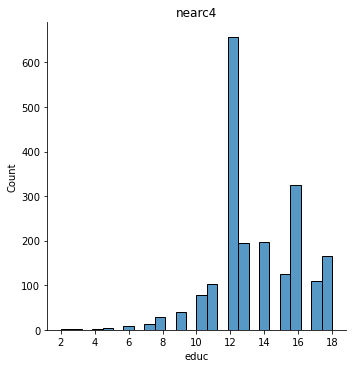

In [43]:
plt.figure(figsize=(14,10))

nearc4=card.loc[card['nearc4']==1]
ax = sns.displot(nearc4,x="educ")

plt.title('nearc4')
plt.xlabel('educ')
plt.ylabel('Count')
plt.show()

<Figure size 1008x720 with 0 Axes>

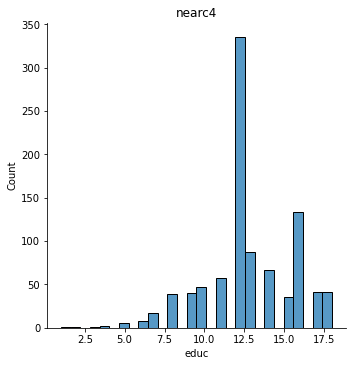

In [44]:
plt.figure(figsize=(14,10))

nearc4=card.loc[card['nearc4']==0]
ax = sns.displot(nearc4,x="educ")

plt.title('nearc4')
plt.xlabel('educ')
plt.ylabel('Count')
plt.show()

Comparando y describiendo: Se puede evidenciar que la variable educación varía de manera diferente cuando (nearc4) == 1 y cuando (nearc4) == 0. De manera general hay una evidencia clara: la mayoría de personas, a pesar de la variable nearc4, llegan a los 12 años de educación, en el cual se encuentra un pico acumulativo de personas con esa educación en años. Asimismo, también se aprecia que cuando nearc4 es 1, la tendencia a que las personas estudien más años aumenta, mientras que, cuando la misma variable es 0, la tendencia a que las personas estudien más años si bien aumenta, es menor en comparación a la otra gráfica. Por otro lado, también se puede notar que un porcentaje reducido de la población tiene 10 o menos años de estudio y que, por ende, la mayor parte de la población tiene más de 12 años de estudio, disminuyendo este con los años. Por último, en ambos gráficos  se reconoce un gran porcentaje de personas que estudiaron 16 años.

- Grafique dos histogramas para la variable años del logaritmos de los ingresos (lwage) para cuando (nearc4) == 1, y cuando (nearc4) == 0. Compare y describa los patrones que encuentra.

<Figure size 1008x720 with 0 Axes>

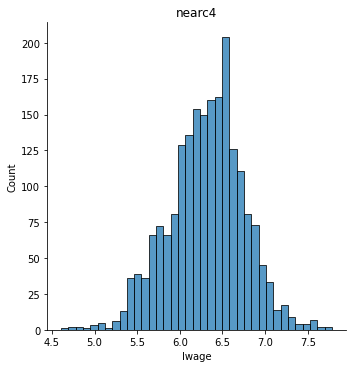

In [41]:
plt.figure(figsize=(14,10))

nearc4=card.loc[card['nearc4']==1]
ax = sns.displot(nearc4,x="lwage")

plt.title('nearc4')
plt.xlabel('lwage')
plt.ylabel('Count')
plt.show()

<Figure size 1008x720 with 0 Axes>

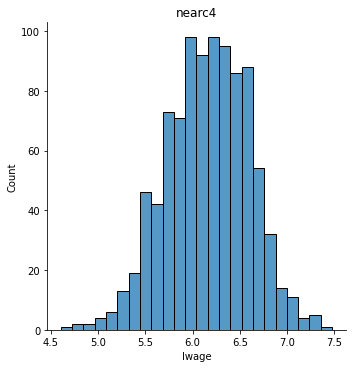

In [42]:
plt.figure(figsize=(14,10))

nearc4=card.loc[card['nearc4']==0]
ax = sns.displot(nearc4,x="lwage")

plt.title('nearc4')
plt.xlabel('lwage')
plt.ylabel('Count')
plt.show()

Comparando y describiendo: Se puede evidenciar que la variable ingresos varía de manera diferente cuando (nearc4) == 1 y cuando (nearc4) == 0. De manera general se puede visualizar que el efecto de nearc4 es bastante claro. En primer lugar, cuando nearc4 es 1, la mayoría de personas tienen a tener un salario alto; mientras que cuando nearc4 es 0 esto varía y, en realidad, se podría decir que hay una cantidad similiar de personas que tienen un menor y mayor salario. Por otro lado, en el segundo caso no hay personas que pasen los 7.5 de salario, mientras que en el primer caso sí los hay. Asimismo, en ambas partes, pero en proporción distinta, hay personas con un salario bajo.

### Regresiones

- Corran una regresion lineal del tipo "lwage ~ educ + exper + black + south + married + smsa", y expliquen los resultados que encuentran.

In [19]:
#OLS
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.97e-232
Time:                        12:31:29   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Resultados: Tras la regresión lineal se puede el efecto de las variables independientes. Primero, educ, exper y smsa son las variables que tienen un relación directa con lwage; mientras que black, south y married  tienen una relación inversa con la misma.
En este sentido también se puede decir que:

- cuando educación aumenta en uno, lwage (o el nivel de ingresos) aumentaría en 0.07
- cuando exper aumenta en uno, lwage aumenta en 0.03
- cuando smsa aumenta en uno, lwage aumenta en 0.17
- cuando black aumenta en uno, lwage disminuye en 0.16
- cuando south aumenta en uno, lwage disminuye en 0.13
- y, finalmente, cuando married aumenta en uno, lwage disminuye en 0.03

Después de lo mencionado se expone que la variable smsa es la que más hace variar a lwage. Asimismo, también se puede notar que el modelo explica en un 30% a la variable dependiente.

- Corran una regresion de tipo IV (usando el paquete IV2SLS) donde van a instrumentalizar la variable (educ) con (nearc2). La regressión debería tener una forma de este tipo "lwage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc4]". Compare los resultados encontrados en la regresión de arriba. Cambió el coeficiente relacionado a (educ), ¿por qué?

In [20]:
#2SLS
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc4 ]", card).fit()
iv_reg.summary

/Users/lusarmiento/opt/anaconda3/lib/python3.9/site-packages/linearmodels/iv/model.py:543: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(


<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                      0.2513
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2498
No. Observations:                3003   F-statistic:                    892.71
Date:                Sun, Nov 13 2022   P-value (F-stat)                0.0000
Time:                        12:34:28   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      4.1625     0.8349     4.9857     0.0000      2.5262      5.7988
black         -0.1157     0.0496    -2.3343     0.0196     -0.2128     -0.0186
exper          0.0556     0.0199     2.7980     0.0051      0.0166      0.0945
married       -0.0320     0.0051    -6.3037     0.0000     -0.0419     -0.0220
smsa           0.1477     0.0303     4.8721     0.0000      0.0883      0.2071
south         -0.1132     0.0229    -4.9314     0.0000     -0.1581     -0.0682
educ           0.1242     0.0492     2.5258     0.0115      0.0278      0.2205
==============================================================================

Endogenous: educ
Instruments: nearc4
Robust Covariance (Heteroskedastic)
Debiased: False
"""

Comparando resultados:  
Tras las regresiones se puede observar que en cuanto a la relación de las independientes con la dependiente no hay variaciones pues estas siguen teniendo la relación de la primera regresión: educ, exper y smsa mantienen una relación directa con lwage; y, black, south y married  mantienen una relación inversa con la misma. Por otro lado, si se puede notar cambios con respecto al estimado de variación de lwage cuando las variables aumentan o disminuyen en uno:

- cuando educ aumenta en uno, lwage aumentaría ya no en 0.07, sino en 0.12
- cuando exper aumenta en uno, lwage aumentaría ya no en 0.03, sino en 0.05
- cuando smsa aumenta en uno, lwage aumentaría ya no en 0.17, sino en 0.14
- cuando black aumenta en uno, lwage disminuiría ya no en 0.16, sino en 0.11
- cuando south aumenta en uno, lwage disminuiría ya no en 0.13, sino en 0.11
- sin embargo, cuando married aumenta en uno, lwage seguiría diminuyendo en 0.03.

Asimismo, este segundo modelo de regresión explica menos que el primero pues tiene un porcentaje de explicación de 24%.